In [116]:
import os
import pandas as pd
import numpy as np

import re
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
mouse_human_conversion = pd.read_excel('/home/jing/Phd_project/project_UCD_blca/blca_publication/blca_publication_Scripts/blca_Scripts_fgfr/idmap.xlsx')

In [118]:
mouse_human_conversion

,query,entrezgene,name,symbol,alias,taxid,MGI
0,ABCA9,217262.0,"ATP-binding cassette, sub-family A member 9",Abca9,D630040K07Rik,10090.0,MGI:2386796
1,ABCB7,11306.0,"ATP-binding cassette, sub-family B member 7",Abcb7,Abc7,10090.0,MGI:109533
2,ACPP,56318.0,acid phosphatase 3,Acp3,"5'-NT, A030005E02Rik, Acpp, FRAP, Lap",10090.0,MGI:1928480
3,ACSBG1,94180.0,acyl-CoA synthetase bubblegum family member 1,Acsbg1,"BG1, Bgm, E230019G03Rik, GR-LACS, Lpd",10090.0,MGI:2385656
4,ADAMTSL1,77739.0,ADAMTS-like 1,Adamtsl1,"5930437A14Rik, 6720426B09Rik, ADAMTSL-1",10090.0,MGI:1924989
...,...,...,...,...,...,...,...
162,TPCN1,252972.0,two pore channel 1,Tpcn1,"5730403B01Rik, Tpc1, mKIAA1169",10090.0,MGI:2182472
163,UGT2B35,243085.0,"UDP glucuronosyltransferase 2 family, polypept...",Ugt2b35,C730031G17,10090.0,MGI:3576100
164,VSIR,74048.0,V-set immunoregulatory receptor,Vsir,"4632428N05Rik, Dies1, PD-1H, VISTA",10090.0,MGI:1921298
165,WFDC1,67866.0,WAP four-disulfide core domain 1,Wfdc1,"2310058A03Rik, ps20",10090.0,MGI:1915116


In [119]:
logfold_df = pd.read_excel('/home/jing/Phd_project/project_UCD_blca/blca_publication/blca_publication_Scripts/blca_Scripts_fgfr/GEO36273937_logfold.xlsx',sheet_name='LIMMA_DEGs_Tum_vs_Nurothelium',
                           header=1,index_col=0)

#LIMMA_DEGs_Hyper_vs_Nurothelium'

In [120]:
logfold_df

,GeneID,logFC,AveExpr,t,P.Value,adj.P.Val
Probeset_ID,,,,,,
208898_at,Unc13c,-1.660587,5.812548,-14.538125,9.596314e-08,0.001617
94180_at,Acsbg1,2.271875,9.639502,13.640567,1.701510e-07,0.001617
269959_at,Adamtsl3,-1.409333,6.019062,-13.498104,1.869326e-07,0.001617
243085_at,Ugt2b35,-1.773383,4.703899,-12.597547,3.462226e-07,0.001617
56318_at,Acpp,-2.465987,7.000826,-12.520507,3.656356e-07,0.001617
...,...,...,...,...,...,...
382156_at,Fbxw22,-0.742282,4.889858,-4.319483,1.759746e-03,0.049731
19108_at,Prkx,0.642138,10.832475,4.319366,1.760057e-03,0.049731
76142_at,Ppp1r14c,0.681998,6.876813,4.317441,1.765160e-03,0.049737


In [121]:
logfold_df= logfold_df.merge(mouse_human_conversion[['query','symbol']],left_on='GeneID',right_on='symbol',how='left')

In [122]:
logfold_df

,GeneID,logFC,AveExpr,t,P.Value,adj.P.Val,query,symbol
0,Unc13c,-1.660587,5.812548,-14.538125,9.596314e-08,0.001617,NaN,NaN
1,Acsbg1,2.271875,9.639502,13.640567,1.701510e-07,0.001617,ACSBG1,Acsbg1
2,Adamtsl3,-1.409333,6.019062,-13.498104,1.869326e-07,0.001617,ADAMTSL3,Adamtsl3
3,Ugt2b35,-1.773383,4.703899,-12.597547,3.462226e-07,0.001617,UGT2B35,Ugt2b35
4,Acpp,-2.465987,7.000826,-12.520507,3.656356e-07,0.001617,NaN,NaN
...,...,...,...,...,...,...,...,...
984,Fbxw22,-0.742282,4.889858,-4.319483,1.759746e-03,0.049731,NaN,NaN
985,Prkx,0.642138,10.832475,4.319366,1.760057e-03,0.049731,NaN,NaN
986,Ppp1r14c,0.681998,6.876813,4.317441,1.765160e-03,0.049737,NaN,NaN
987,Mapk6,0.693113,10.184977,4.316899,1.766601e-03,0.049737,NaN,NaN


In [123]:
logfold_df.dropna(inplace=True)

In [124]:
logfold_df

,GeneID,logFC,AveExpr,t,P.Value,adj.P.Val,query,symbol
1,Acsbg1,2.271875,9.639502,13.640567,1.701510e-07,0.001617,ACSBG1,Acsbg1
2,Adamtsl3,-1.409333,6.019062,-13.498104,1.869326e-07,0.001617,ADAMTSL3,Adamtsl3
3,Ugt2b35,-1.773383,4.703899,-12.597547,3.462226e-07,0.001617,UGT2B35,Ugt2b35
7,Fmod,-1.918295,6.744980,-12.295507,4.295386e-07,0.001617,FMOD,Fmod
10,Dlc1,-1.362206,7.889044,-11.540767,7.521254e-07,0.001718,DLC1,Dlc1
...,...,...,...,...,...,...,...,...
847,Nsg1,-0.939931,6.819877,-4.584489,1.187093e-03,0.040145,NSG1,Nsg1
866,Npr2,-1.902868,7.966943,-4.540107,1.267103e-03,0.041790,NPR2,Npr2
915,Tcf21,-3.256374,8.444172,-4.450824,1.446009e-03,0.044733,TCF21,Tcf21
916,Ppp1r14a,-1.539757,8.089724,-4.447390,1.453406e-03,0.044918,PPP1R14A,Ppp1r14a


In [125]:
#Depmap
blca= pd.read_csv('/home/jing/Phd_project/project_UCD_blca/blca_DATA/blca_DATA_depmep/OmicsExpressionProteinCodingGenesTPMLogp1.csv',index_col=0)

In [126]:
blca

,TSPAN6 (7105),TNMD (64102),DPM1 (8813),SCYL3 (57147),C1orf112 (55732),FGR (2268),CFH (3075),FUCA2 (2519),GCLC (2729),NFYA (4800),...,H3C2 (8358),H3C3 (8352),AC098582.1 (8916),DUS4L-BCAP29 (115253422),C8orf44-SGK3 (100533105),ELOA3B (728929),NPBWR1 (2831),ELOA3D (100506888),ELOA3 (162699),CDR1 (1038)
ACH-001113,4.331992,0.000000,7.364660,2.792855,4.471187,0.028569,1.226509,3.044394,6.500005,4.739848,...,2.689299,0.189034,0.201634,2.130931,0.555816,0.000000,0.275007,0.0,0.000000,0.000000
ACH-001289,4.567424,0.584963,7.106641,2.543496,3.504620,0.000000,0.189034,3.813525,4.221877,3.481557,...,1.286881,1.049631,0.321928,1.464668,0.632268,0.000000,0.014355,0.0,0.000000,0.000000
ACH-001339,3.150560,0.000000,7.379118,2.333424,4.228049,0.056584,1.310340,6.687201,3.682573,3.273516,...,0.594549,1.097611,0.831877,2.946731,0.475085,0.000000,0.084064,0.0,0.000000,0.042644
ACH-001538,5.085340,0.000000,7.154211,2.545968,3.084064,0.000000,5.868390,6.165309,4.489928,3.956986,...,0.214125,0.632268,0.298658,1.641546,0.443607,0.000000,0.028569,0.0,0.000000,0.000000
ACH-000242,6.729417,0.000000,6.537917,2.456806,3.867896,0.799087,7.208478,5.570159,7.127117,4.568032,...,1.117695,2.358959,0.084064,1.910733,0.000000,0.000000,0.464668,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000285,0.056584,0.000000,6.604368,3.266037,4.973152,0.411426,0.097611,0.704872,4.829850,5.178715,...,2.229588,0.084064,1.310340,3.039138,0.344828,0.000000,0.000000,0.0,0.475085,0.042644
ACH-002669,3.111031,0.000000,7.031329,1.541019,3.664483,0.014355,3.624101,6.805421,4.472488,4.397118,...,0.189034,0.400538,0.356144,1.327687,0.000000,0.000000,0.014355,0.0,0.000000,0.000000
ACH-001858,4.390943,0.000000,7.013239,1.887525,3.252476,0.028569,3.286881,6.902194,5.410748,3.401903,...,1.097611,0.400538,0.613532,1.992768,0.704872,0.000000,1.464668,0.0,0.000000,0.526069
ACH-001997,5.057450,0.000000,7.815191,2.538538,3.893362,0.028569,4.079805,6.971659,4.469886,3.463361,...,0.831877,0.847997,1.292782,2.153805,0.687061,0.000000,0.000000,0.0,0.000000,0.000000


In [127]:
blca.columns = [re.sub(r'\s*\(.*?\)', '', s) for s in list(blca.columns)]

In [128]:
blca

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,H3C2,H3C3,AC098582.1,DUS4L-BCAP29,C8orf44-SGK3,ELOA3B,NPBWR1,ELOA3D,ELOA3,CDR1
ACH-001113,4.331992,0.000000,7.364660,2.792855,4.471187,0.028569,1.226509,3.044394,6.500005,4.739848,...,2.689299,0.189034,0.201634,2.130931,0.555816,0.000000,0.275007,0.0,0.000000,0.000000
ACH-001289,4.567424,0.584963,7.106641,2.543496,3.504620,0.000000,0.189034,3.813525,4.221877,3.481557,...,1.286881,1.049631,0.321928,1.464668,0.632268,0.000000,0.014355,0.0,0.000000,0.000000
ACH-001339,3.150560,0.000000,7.379118,2.333424,4.228049,0.056584,1.310340,6.687201,3.682573,3.273516,...,0.594549,1.097611,0.831877,2.946731,0.475085,0.000000,0.084064,0.0,0.000000,0.042644
ACH-001538,5.085340,0.000000,7.154211,2.545968,3.084064,0.000000,5.868390,6.165309,4.489928,3.956986,...,0.214125,0.632268,0.298658,1.641546,0.443607,0.000000,0.028569,0.0,0.000000,0.000000
ACH-000242,6.729417,0.000000,6.537917,2.456806,3.867896,0.799087,7.208478,5.570159,7.127117,4.568032,...,1.117695,2.358959,0.084064,1.910733,0.000000,0.000000,0.464668,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000285,0.056584,0.000000,6.604368,3.266037,4.973152,0.411426,0.097611,0.704872,4.829850,5.178715,...,2.229588,0.084064,1.310340,3.039138,0.344828,0.000000,0.000000,0.0,0.475085,0.042644
ACH-002669,3.111031,0.000000,7.031329,1.541019,3.664483,0.014355,3.624101,6.805421,4.472488,4.397118,...,0.189034,0.400538,0.356144,1.327687,0.000000,0.000000,0.014355,0.0,0.000000,0.000000
ACH-001858,4.390943,0.000000,7.013239,1.887525,3.252476,0.028569,3.286881,6.902194,5.410748,3.401903,...,1.097611,0.400538,0.613532,1.992768,0.704872,0.000000,1.464668,0.0,0.000000,0.526069
ACH-001997,5.057450,0.000000,7.815191,2.538538,3.893362,0.028569,4.079805,6.971659,4.469886,3.463361,...,0.831877,0.847997,1.292782,2.153805,0.687061,0.000000,0.000000,0.0,0.000000,0.000000


In [129]:
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines= blca.loc[cell_line_ids]


### nm STV all male

In [130]:
vector = pd.read_pickle(os.path.join('/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_svm',"stv_lincs_scR_inv_blca_N_M.pkl"))
vector

,n,s
Gene,,
TSPAN6,-0.034897,-0.037459
SCYL3,0.010684,-0.000009
BAD,0.011406,0.008134
LAP3,0.039985,0.007045
SNX11,-0.007368,0.003394
...,...,...
RBM15B,-0.034411,-0.002441
MRPL12,0.002169,0.040614
IKBKE,-0.017889,0.002847


In [131]:
vector= vector.loc[blca.columns.intersection(vector.index.values)]
vector

,n,s
TSPAN6,-0.034897,-0.037459
SCYL3,0.010684,-0.000009
BAD,0.011406,0.008134
LAP3,0.039985,0.007045
SNX11,-0.007368,0.003394
...,...,...
RBM15B,-0.034411,-0.002441
MRPL12,0.002169,0.040614
IKBKE,-0.017889,0.002847
DUSP14,0.006463,0.020407


In [132]:
#dot product
blca_lm=blca[blca.columns.intersection(vector.index)]
display(blca_lm)

,TSPAN6,SCYL3,BAD,LAP3,SNX11,CASP10,CFLAR,FKBP4,RBM6,SLC25A13,...,TWF2,HOXA10,LYN,CHMP4A,POLG2,RBM15B,MRPL12,IKBKE,DUSP14,PIP4K2B
ACH-001113,4.331992,2.792855,5.159871,4.783457,4.218781,2.000000,5.040454,6.632850,5.515069,3.276497,...,3.864929,0.000000,3.023255,6.287805,5.244126,3.620586,5.084064,0.097611,5.105594,4.934517
ACH-001289,4.567424,2.543496,5.543805,6.333782,4.289097,0.286881,4.414812,6.336462,5.490570,4.709842,...,4.882154,0.622930,1.469886,6.627753,4.154616,4.112700,5.460415,0.925999,5.304146,4.956986
ACH-001339,3.150560,2.333424,4.549053,6.161081,4.205549,1.207893,4.683135,5.364222,4.513491,5.195348,...,5.148527,4.326250,2.735522,5.694602,3.333424,3.190615,6.217812,2.516015,5.570159,4.213347
ACH-001538,5.085340,2.545968,5.537917,5.244887,3.438293,2.704872,4.514122,6.442612,5.146085,4.154616,...,5.439956,0.042644,3.053111,6.090218,3.842979,3.654206,6.721236,3.023255,4.100137,3.817623
ACH-000242,6.729417,2.456806,6.120186,5.712045,3.962549,1.996389,4.348374,6.162492,6.155628,4.974529,...,5.099295,3.729009,2.166715,6.642557,2.992768,5.202026,7.414558,3.651913,3.785551,4.192983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000285,0.056584,3.266037,6.109987,6.055933,4.838448,0.226509,2.684819,7.425342,6.404120,3.891419,...,5.557961,3.416840,4.048759,6.602884,5.776630,4.876762,7.796559,3.710393,3.163499,5.390255
ACH-002669,3.111031,1.541019,4.179511,5.836429,3.576522,3.428946,6.235727,6.324091,4.473137,4.909293,...,3.860963,3.521051,3.935460,6.144658,3.381283,2.994580,5.622930,3.358959,4.634012,3.107688
ACH-001858,4.390943,1.887525,5.680324,5.381283,3.939227,2.087463,5.052242,4.890933,4.512859,4.650190,...,5.745506,3.240314,3.563158,5.743623,3.634593,3.759156,6.482687,3.794936,4.737687,4.450881
ACH-001997,5.057450,2.538538,6.194954,7.678072,4.464668,2.066950,5.054414,5.929081,4.768184,4.522935,...,5.366672,3.381283,3.522307,6.693348,3.656496,4.169925,7.405822,2.987321,5.858727,3.737687


In [133]:
DPD_df = pd.DataFrame(
    np.zeros((len(blca_lm), 1)),
    index = list(blca_lm.index),
    columns = ['invasiveness'],
)

### SCVI log fold changes

In [134]:
scvi_lfc = pd.read_excel('/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_svm/blca_scR_scvi_DEG.xlsx',index_col=0)

In [135]:
scvi_lfc_df= scvi_lfc.iloc[2000:4000][['Gene','lfc_mean']]
scvi_lfc_df

,Gene,lfc_mean
comparison,,
cluster1_T2 vs Rest,S100A8,11.116735
NaN,TCHH,8.430903
NaN,LYNX1,7.749890
NaN,S100A9,7.666663
NaN,SERPINB4,7.538958
...,...,...
NaN,SPOCD1,-6.174197
NaN,TESC,-6.383301
NaN,IGFBP2,-7.289587


In [136]:
scvi_lfc_df.reset_index(inplace=True)
scvi_lfc_df.drop(columns=['comparison'],inplace=True)
scvi_lfc_df.set_index('Gene',inplace=True)
scvi_lfc_df

,lfc_mean
Gene,
S100A8,11.116735
TCHH,8.430903
LYNX1,7.749890
S100A9,7.666663
SERPINB4,7.538958
...,...
SPOCD1,-6.174197
TESC,-6.383301
IGFBP2,-7.289587


In [137]:
blca_lm=blca[blca.columns.intersection(scvi_lfc_df.index)]
display(blca_lm)

,TSPAN6,GCLC,CD99,HS3ST1,TMEM176A,TFPI,ARF5,PLXND1,RECQL,PDK4,...,CCL4,FCGBP,CCL15,UHRF1,CCL4L2,CCL3L3,MARCKS,CCL3,CISD3,ADORA3
ACH-001113,4.331992,6.500005,5.941576,0.097611,0.000000,0.056584,7.055174,5.289834,6.505097,0.000000,...,0.000000,0.084064,0.000000,5.223423,0.097611,0.214125,6.817751,0.000000,4.187451,0.000000
ACH-001289,4.567424,4.221877,6.759688,0.084064,0.056584,0.056584,7.561861,3.769772,5.390255,0.000000,...,0.000000,0.070389,0.000000,4.595742,0.097611,0.000000,4.741467,0.150560,3.640390,0.028569
ACH-001339,3.150560,3.682573,8.295998,0.422233,0.201634,4.060912,6.686781,7.216746,6.234961,1.378512,...,0.214125,0.014355,0.000000,3.903038,0.000000,0.176323,5.954662,1.035624,4.566815,0.137504
ACH-001538,5.085340,4.489928,6.909413,2.718088,0.070389,3.317594,6.980254,0.948601,5.638943,2.430285,...,0.659925,0.028569,0.056584,3.782409,0.000000,0.000000,6.244126,0.722466,3.491853,0.000000
ACH-000242,6.729417,7.127117,7.208283,3.005400,0.000000,0.855990,7.428276,2.518535,4.836429,1.007196,...,0.056584,1.163499,0.918386,6.211986,0.000000,0.000000,5.599913,0.097611,4.571070,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000285,0.056584,4.829850,5.217618,0.632268,0.000000,0.250962,7.767125,3.195348,6.551208,0.028569,...,0.163499,1.580145,0.042644,7.921781,0.000000,0.042644,4.488001,1.070389,3.825786,0.056584
ACH-002669,3.111031,4.472488,6.550131,1.735522,3.580145,6.744430,7.206331,4.947666,5.870858,0.495695,...,0.084064,0.124328,0.000000,3.634593,0.226509,2.422233,3.903038,1.490570,3.171527,0.000000
ACH-001858,4.390943,5.410748,8.545853,0.757023,0.000000,8.195692,7.899357,6.558115,6.041988,0.941106,...,0.000000,0.176323,0.000000,3.752749,0.000000,0.000000,6.637349,0.000000,4.233428,0.028569
ACH-001997,5.057450,4.469886,7.018256,2.226509,0.422233,5.441616,7.922495,4.145677,5.310704,1.454176,...,0.000000,0.992768,0.000000,5.293150,0.000000,0.000000,5.920293,0.263034,4.662775,0.000000


In [138]:
scvi_lfc_df_int=scvi_lfc_df.loc[blca.columns.intersection(scvi_lfc_df.index)]
scvi_lfc_df_int

,lfc_mean
TSPAN6,-0.234558
GCLC,-1.773214
CD99,0.257408
HS3ST1,-1.921947
TMEM176A,0.468119
...,...
CCL3L3,1.492260
MARCKS,1.338571
CCL3,1.823231
CISD3,-0.080692


In [139]:
DPD_df = pd.DataFrame(
    np.zeros((len(blca_lm), 1)),
    index = list(blca_lm.index),
    columns = ['invasiveness'],
)

In [140]:
for exp_id in DPD_df.index:
    DPD_df.loc[exp_id, 'invasiveness'] = np.dot(blca_lm.loc[exp_id], scvi_lfc_df_int['lfc_mean'])

display(DPD_df)

,invasiveness
ACH-001113,2137.964858
ACH-001289,1622.465807
ACH-001339,1872.431520
ACH-001538,2147.856437
ACH-000242,468.987189
...,...
ACH-000285,2237.345094
ACH-002669,1754.058281
ACH-001858,1752.506003
ACH-001997,1440.822063


In [141]:
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines= DPD_df.loc[cell_line_ids]
DPD_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']


In [142]:
DPD_cell_lines

,invasiveness,cell_line_name
ACH-000142,1671.339754,CAL29
ACH-000593,2112.445716,BC3C
ACH-000396,1741.714541,J82
ACH-000242,468.987189,RT4
ACH-000384,1359.179001,SW780
ACH-000018,1842.661612,T24
ACH-000724,2330.059510,HT1376


In [143]:
DPD_cell_lines.sort_values('invasiveness', ascending=False)

,invasiveness,cell_line_name
ACH-000724,2330.059510,HT1376
ACH-000593,2112.445716,BC3C
ACH-000018,1842.661612,T24
ACH-000396,1741.714541,J82
ACH-000142,1671.339754,CAL29
ACH-000384,1359.179001,SW780
ACH-000242,468.987189,RT4


###
RT4     468          T1 Low grade papillary 
SW780  1359.179001   Low grade 
CAL29  1671.339754   T2
J82    1741.714541   T3 
T24    1842.661612   Invasive High Grade T2
BC3C   2112.445716   Invasive
HT1376 2330.059510   Invasive

WORKED OMG!!!

🔵 RT4, SW780 → Low grade, non-invasive

🟡 CAL29, J82 → Transitioning (T2, T3)

🔴 T24, BC3C, HT1376 → High-grade, invasive monsters


In [144]:
#Try the other non invasive marker list and see what happenes

In [145]:
scvi_lfc.loc['cluster1_Ta vs Rest']

Unnamed: 1                              4001
Gene                                   UPK1A
proba_de                              0.9706
proba_not_de                          0.0294
bayes_factor                        3.496919
scale1                              0.000999
scale2                              0.000261
pseudocounts                               0
delta                                   0.25
lfc_mean                            4.145653
lfc_median                          4.283583
lfc_std                             5.878946
lfc_min                           -14.903339
lfc_max                            16.361252
raw_mean1                           5.363581
raw_mean2                           1.929304
non_zeros_proportion1               0.629159
non_zeros_proportion2               0.224715
raw_normalized_mean1                9.519425
raw_normalized_mean2                2.582447
is_de_fdr_0.05                          True
comparison.1             cluster1_Ta vs Rest
group1    

In [211]:
scvi_lfc_ta = scvi_lfc.iloc[4000:][['Gene','proba_not_de','lfc_mean']]#n=2000

In [214]:
scvi_lfc_ta_p= scvi_lfc_ta[scvi_lfc_ta['proba_not_de']<0.05]
scvi_lfc_ta_p
#reajusting using p values

,Gene,proba_not_de,lfc_mean
comparison,,,
cluster1_Ta vs Rest,UPK1A,0.0294,4.145653
NaN,EPB41L3,0.0384,3.596798
NaN,PHGR1,0.0384,3.159316
NaN,SPOCK1,0.0428,3.138652
NaN,FABP4,0.0468,2.719189
NaN,APOBEC3A,0.0428,2.641204
NaN,UPK2,0.0324,2.453950
NaN,PRSS3,0.0468,2.433979
NaN,UPK3A,0.0414,2.246436


In [ ]:
scvi_lfc_ta_p.reset_index(inplace=True)
scvi_lfc_ta_p.drop(columns=['comparison'],inplace=True)
scvi_lfc_ta_p.set_index('Gene',inplace=True)
scvi_lfc_ta_p

In [218]:
scvi_lfc_ta_p.shape

(49, 2)

In [216]:
blca_lm=blca[blca.columns.intersection(scvi_lfc_ta_p.index)]
display(blca_lm)

,PRSS3,SERPINB3,CXCL2,EPB41L3,LYZ,UPK3A,UPK1A,UPK2,UPK1B,EREG,...,BASP1,THBD,ARL14,MYADM,KRT5,FPR3,SERPINB4,PHGR1,ADH1C,MSMB
ACH-001113,0.000000,1.021480,2.485427,0.782409,0.000000,0.000000,0.111031,0.555816,0.084064,0.000000,...,6.486714,0.163499,0.201634,5.691534,7.676310,0.000000,0.000000,0.000000,0.000000,0.189034
ACH-001289,0.070389,0.000000,0.000000,4.742545,0.000000,0.042644,0.000000,0.056584,0.000000,0.226509,...,0.765535,0.014355,0.516015,3.632268,0.150560,0.333424,0.000000,0.000000,0.000000,0.000000
ACH-001339,0.000000,0.028569,0.356144,4.280956,2.244887,0.000000,0.042644,0.070389,0.097611,1.049631,...,1.560715,0.650765,0.189034,4.043519,0.286881,0.214125,0.000000,0.000000,0.070389,0.000000
ACH-001538,4.305971,2.715893,2.498251,0.070389,0.042644,0.000000,0.000000,2.097611,0.070389,7.585639,...,0.028569,5.931919,2.563158,5.746313,5.581351,0.000000,2.336283,0.310340,1.238787,0.124328
ACH-000242,1.963474,0.000000,0.124328,2.350497,0.823749,4.931683,5.418527,6.455985,6.733490,0.475085,...,5.155021,3.578939,3.624101,1.454176,0.739848,0.298658,0.000000,1.867896,0.000000,0.344828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000285,0.111031,0.000000,0.028569,0.124328,0.250962,0.214125,0.111031,0.056584,0.124328,0.111031,...,5.596935,0.014355,0.000000,0.275007,0.575312,0.014355,0.000000,0.097611,0.124328,0.000000
ACH-002669,6.195348,4.022368,5.626439,0.000000,0.238787,0.111031,0.176323,0.028569,0.014355,4.552746,...,0.000000,0.000000,2.875780,5.823749,0.042644,0.000000,5.583158,0.000000,0.000000,0.000000
ACH-001858,2.395063,0.443607,2.283922,1.286881,0.070389,0.000000,0.014355,1.815575,1.176323,0.056584,...,7.425594,2.467279,1.757023,4.930264,0.084064,0.014355,0.378512,0.000000,0.214125,0.000000
ACH-001997,4.799605,0.028569,1.618239,1.521051,7.510408,0.097611,0.000000,7.435379,0.028569,0.263034,...,0.000000,0.432959,3.571677,0.084064,5.346248,0.000000,0.014355,0.000000,0.042644,0.298658


In [220]:
scvi_lfc_ta_p=scvi_lfc_ta_p.loc[blca.columns.intersection(scvi_lfc_ta_p.index)]
scvi_lfc_ta_p

,proba_not_de,lfc_mean
PRSS3,0.0468,2.433979
SERPINB3,0.0428,-0.610879
CXCL2,0.0416,-1.296769
EPB41L3,0.0384,3.596798
LYZ,0.0460,-0.830272
UPK3A,0.0414,2.246436
UPK1A,0.0294,4.145653
UPK2,0.0324,2.453950
UPK1B,0.0328,0.067315
EREG,0.0482,1.820718


In [221]:
DPD_df = pd.DataFrame(
    np.zeros((len(blca_lm), 1)),
    index = list(blca_lm.index),
    columns = ['invasiveness'],
)
for exp_id in DPD_df.index:
    DPD_df.loc[exp_id, 'invasiveness'] = np.dot(blca_lm.loc[exp_id], scvi_lfc_ta_p['lfc_mean'])

display(DPD_df)

,invasiveness
ACH-001113,-57.685376
ACH-001289,11.356368
ACH-001339,-15.947694
ACH-001538,-10.160790
ACH-000242,100.191970
...,...
ACH-000285,-14.735817
ACH-002669,-9.813111
ACH-001858,10.316776
ACH-001997,49.919741


In [223]:
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines= DPD_df.loc[cell_line_ids]
DPD_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']
DPD_cell_lines


,invasiveness,cell_line_name
ACH-000142,44.374977,CAL29
ACH-000593,-39.534627,BC3C
ACH-000396,10.840041,J82
ACH-000242,100.191970,RT4
ACH-000384,92.161435,SW780
ACH-000018,27.597585,T24
ACH-000724,-4.405735,HT1376


In [ ]:

🔵 RT4, SW780 → Low grade, non-invasive

🟡 CAL29, J82 → Transitioning (T2, T3)

🔴 T24, BC3C, HT1376 → High-grade, invasive monsters

### Take 1  

In [147]:
scvi_lfc_ta.reset_index(inplace=True)
scvi_lfc_ta.drop(columns=['comparison'],inplace=True)
scvi_lfc_ta.set_index('Gene',inplace=True)
scvi_lfc_ta

,lfc_mean
Gene,
UPK1A,4.145653
EPB41L3,3.596798
PHGR1,3.159316
SPOCK1,3.138652
SDC2,2.722956
...,...
LINC00958,-2.434976
UBE2C,-2.450275
IGKC,-2.843966


In [148]:
blca_lm=blca[blca.columns.intersection(scvi_lfc_ta.index)]
display(blca_lm)

,TSPAN6,GCLC,CD99,HS3ST1,TMEM176A,TFPI,ARF5,PLXND1,RECQL,PDK4,...,CCL4,FCGBP,CCL15,UHRF1,CCL4L2,CCL3L3,MARCKS,CCL3,CISD3,ADORA3
ACH-001113,4.331992,6.500005,5.941576,0.097611,0.000000,0.056584,7.055174,5.289834,6.505097,0.000000,...,0.000000,0.084064,0.000000,5.223423,0.097611,0.214125,6.817751,0.000000,4.187451,0.000000
ACH-001289,4.567424,4.221877,6.759688,0.084064,0.056584,0.056584,7.561861,3.769772,5.390255,0.000000,...,0.000000,0.070389,0.000000,4.595742,0.097611,0.000000,4.741467,0.150560,3.640390,0.028569
ACH-001339,3.150560,3.682573,8.295998,0.422233,0.201634,4.060912,6.686781,7.216746,6.234961,1.378512,...,0.214125,0.014355,0.000000,3.903038,0.000000,0.176323,5.954662,1.035624,4.566815,0.137504
ACH-001538,5.085340,4.489928,6.909413,2.718088,0.070389,3.317594,6.980254,0.948601,5.638943,2.430285,...,0.659925,0.028569,0.056584,3.782409,0.000000,0.000000,6.244126,0.722466,3.491853,0.000000
ACH-000242,6.729417,7.127117,7.208283,3.005400,0.000000,0.855990,7.428276,2.518535,4.836429,1.007196,...,0.056584,1.163499,0.918386,6.211986,0.000000,0.000000,5.599913,0.097611,4.571070,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000285,0.056584,4.829850,5.217618,0.632268,0.000000,0.250962,7.767125,3.195348,6.551208,0.028569,...,0.163499,1.580145,0.042644,7.921781,0.000000,0.042644,4.488001,1.070389,3.825786,0.056584
ACH-002669,3.111031,4.472488,6.550131,1.735522,3.580145,6.744430,7.206331,4.947666,5.870858,0.495695,...,0.084064,0.124328,0.000000,3.634593,0.226509,2.422233,3.903038,1.490570,3.171527,0.000000
ACH-001858,4.390943,5.410748,8.545853,0.757023,0.000000,8.195692,7.899357,6.558115,6.041988,0.941106,...,0.000000,0.176323,0.000000,3.752749,0.000000,0.000000,6.637349,0.000000,4.233428,0.028569
ACH-001997,5.057450,4.469886,7.018256,2.226509,0.422233,5.441616,7.922495,4.145677,5.310704,1.454176,...,0.000000,0.992768,0.000000,5.293150,0.000000,0.000000,5.920293,0.263034,4.662775,0.000000


In [100]:
scvi_lfc_ta_int=scvi_lfc_ta.loc[blca.columns.intersection(scvi_lfc_ta.index)]
scvi_lfc_ta_int

,lfc_mean
TSPAN6,0.474446
GCLC,0.922369
CD99,-0.357701
HS3ST1,0.152747
TMEM176A,1.065262
...,...
CCL3L3,0.090164
MARCKS,0.167338
CCL3,-0.247941
CISD3,0.019287


In [101]:
DPD_df = pd.DataFrame(
    np.zeros((len(blca_lm), 1)),
    index = list(blca_lm.index),
    columns = ['invasiveness'],
)

In [102]:
for exp_id in DPD_df.index:
    DPD_df.loc[exp_id, 'invasiveness'] = np.dot(blca_lm.loc[exp_id], scvi_lfc_ta_int['lfc_mean'])

display(DPD_df)

,invasiveness
ACH-001113,-550.721389
ACH-001289,-507.295265
ACH-001339,-699.813968
ACH-001538,-353.053727
ACH-000242,85.113497
...,...
ACH-000285,-808.317595
ACH-002669,-500.855641
ACH-001858,-418.874928
ACH-001997,-131.478383


In [103]:
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines= DPD_df.loc[cell_line_ids]
DPD_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']


In [105]:
DPD_cell_lines.sort_values('invasiveness', ascending=False)

,invasiveness,cell_line_name
ACH-000242,85.113497,RT4
ACH-000384,77.875909,SW780
ACH-000142,-149.143997,CAL29
ACH-000724,-269.779548,HT1376
ACH-000396,-524.500164,J82
ACH-000593,-573.265111,BC3C
ACH-000018,-631.710524,T24


In [ ]:
WORKED OMG!!!

🔵 RT4, SW780 → Low grade, non-invasive

🟡 CAL29, J82 → Transitioning (T2, T3)

🔴 T24, BC3C, HT1376 → High-grade, invasive monsters


In [ ]:
###
RT4     468          T1 Low grade papillary 
SW780  1359.179001   Low grade 
CAL29  1671.339754   T2
J82    1741.714541   T3 
T24    1842.661612   Invasive High Grade T2
BC3C   2112.445716   Invasive
HT1376 2330.059510   Invasive

#Worked again but gave slightly different results in terms of invasiveness. I will just combine both and plot

In [109]:
data = {
    "cell_line_name": ["RT4", "SW780", "CAL29", "J82", "T24", "BC3C", "HT1376"],
    "invasiveness_T2": [468.000000, 1359.179001, 1671.339754, 1741.714541, 1842.661612, 2112.445716, 2330.059510],
    "stage": ["T1 Low grade papillary", "Low grade", "T2", "T3", "Invasive High Grade T2", "Invasive", "Invasive"],
    "invasiveness_Ta": [85.113497, 77.875909, -149.143997, -524.500164, -631.710524, -573.265111, -269.779548]
}

# Create the DataFrame
df = pd.DataFrame(data)


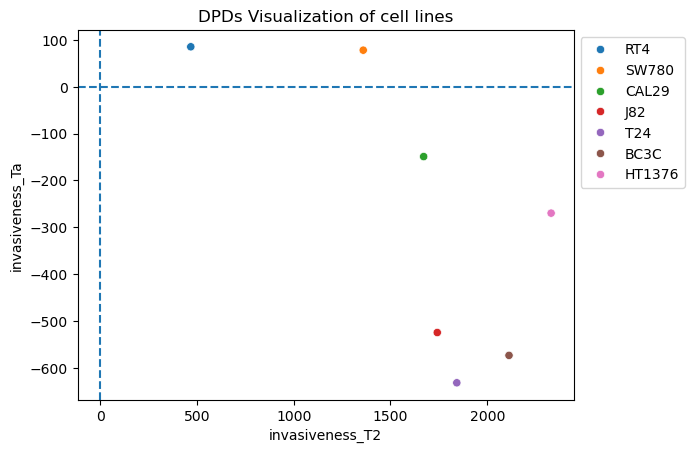

In [111]:
import seaborn as sns
sns.scatterplot(df,y='invasiveness_Ta',x='invasiveness_T2',hue='cell_line_name')
plt.axvline(x=0,linestyle='--')
plt.axhline(y=0,linestyle='--')
plt.title("DPDs Visualization of cell lines")
plt.legend(bbox_to_anchor=(1,0, 0,1))


## LINCs genes now

In [114]:
wkdir= "/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_LINCS/"
data_year = "2020"
cell_name = "BC3C"

data_dir = os.path.join(wkdir,"00_outputs_" + data_year + "_" + cell_name)
data_file = os.path.join(data_dir, "Data_norm_" + data_year + "_" + cell_name+ ".xlsx")
Data_norm = pd.read_excel(data_file, index_col = 0)
display(Data_norm)

genes_list = Data_norm.columns.to_list()
print("Landmark genes in LINCS data:", len(genes_list), genes_list)


,AARS,ABCB6,ABCC5,ABCF1,ABCF3,ABHD4,ABHD6,ABL1,ACAA1,ACAT2,...,ZMIZ1,ZMYM2,ZNF131,ZNF274,ZNF318,ZNF395,ZNF451,ZNF586,ZNF589,ZW10
ASG002_BC3C_24H:A03,-0.191254,-0.055246,0.039596,-0.256266,-0.040419,-0.590523,-0.159396,-0.074319,0.457981,0.409608,...,0.543203,0.494266,-0.011923,-0.225931,0.285054,-0.775246,0.166031,-0.024873,0.238723,0.284204
ASG002_BC3C_24H:A04,-0.265754,-0.317496,0.118696,-0.136665,-0.301569,-0.403023,0.124804,-0.036470,0.311931,0.660457,...,-0.565096,-0.088634,0.122977,-0.047931,0.141804,0.129054,-0.028819,-0.028773,-0.253627,-0.752646
ASG002_BC3C_24H:A05,-0.181954,-0.081597,-0.210304,1.559535,-0.019019,-0.457423,0.071404,0.074080,-0.356119,0.498808,...,0.226104,-0.228034,-0.121023,-0.075331,-0.133146,0.355054,0.022831,-0.084073,0.283123,-0.894896
ASG002_BC3C_24H:A06,0.033446,0.042404,-0.150154,-0.093165,0.053180,-0.053823,0.087704,0.167681,-0.601569,0.383308,...,-0.608596,-0.228835,0.072777,0.082970,-0.570996,2.847754,-0.211670,-0.067273,0.081723,0.338704
ASG002_BC3C_24H:J13,0.204446,0.180704,0.089096,-0.054666,0.053381,0.044877,-0.277396,-0.157419,0.535681,-3.933493,...,-0.318397,0.122265,-0.134323,-0.088931,-0.067996,-0.515847,-0.005069,0.067527,0.002223,0.204904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MOAR012_BC3C_24H:P20,0.647151,0.211700,-0.979200,0.597350,-0.375751,0.388300,0.394524,0.120151,-0.166775,-1.129125,...,-1.598475,-0.552750,0.515151,0.120800,0.082675,0.529700,0.383225,-0.207225,2.268450,-1.248500
MOAR012_BC3C_24H:P21,0.171800,0.046300,-0.145550,-0.295150,0.030849,0.420951,0.222075,0.179800,0.274724,-0.423975,...,-1.650575,0.203600,-0.003250,-0.064800,-0.037675,0.076499,0.201825,0.416875,0.287450,-0.971700
MOAR012_BC3C_24H:P22,0.648700,0.058749,-0.031700,0.408249,-0.753950,0.332200,-0.357525,-0.107650,-0.213575,0.074225,...,0.127625,0.031600,0.103250,-0.249600,0.046375,1.486200,0.440325,0.090075,-0.031650,-0.944300
MOAR012_BC3C_24H:P23,0.090499,-0.469300,-0.611800,0.873550,-0.788450,-0.097199,-0.366575,-0.490600,-0.624675,-0.009275,...,0.054676,-0.596050,0.084600,0.444700,0.431375,-0.921501,0.044926,0.716076,-0.000900,-1.106700


Landmark genes in LINCS data: 978 ['AARS', 'ABCB6', 'ABCC5', 'ABCF1', 'ABCF3', 'ABHD4', 'ABHD6', 'ABL1', 'ACAA1', 'ACAT2', 'ACBD3', 'ACD', 'ACLY', 'ACOT9', 'ADAM10', 'ADAT1', 'ADGRE5', 'ADGRG1', 'ADH5', 'ADI1', 'ADO', 'ADRB2', 'AGL', 'AKAP8', 'AKAP8L', 'AKR7A2', 'AKT1', 'ALAS1', 'ALDH7A1', 'ALDOA', 'ALDOC', 'AMDHD2', 'ANKRD10', 'ANO10', 'ANXA7', 'APBB2', 'APOE', 'APP', 'APPBP2', 'ARFIP2', 'ARHGAP1', 'ARHGEF12', 'ARHGEF2', 'ARID4B', 'ARID5B', 'ARL4C', 'ARNT2', 'ARPP19', 'ASAH1', 'ASCC3', 'ATF1', 'ATF5', 'ATF6', 'ATG3', 'ATMIN', 'ATP11B', 'ATP1B1', 'ATP2C1', 'ATP6V0B', 'ATP6V1D', 'AURKA', 'AURKB', 'AXIN1', 'B4GAT1', 'BACE2', 'BAD', 'BAG3', 'BAMBI', 'BAX', 'BCL2', 'BCL7B', 'BDH1', 'BECN1', 'BHLHE40', 'BID', 'BIRC2', 'BIRC5', 'BLCAP', 'BLMH', 'BLVRA', 'BMP4', 'BNIP3', 'BNIP3L', 'BPHL', 'BRCA1', 'BTK', 'BUB1B', 'BZW2', 'C2CD2', 'C2CD2L', 'C2CD5', 'C5', 'CAB39', 'CALM3', 'CALU', 'CAMSAP2', 'CANT1', 'CAPN1', 'CARMIL1', 'CASC3', 'CASK', 'CASP10', 'CASP2', 'CASP3', 'CASP7', 'CAST', 'CAT', 'CBLB

In [152]:
scvi_lfc_ta_int_lincs= scvi_lfc_ta_int.index.intersection(genes_list)


In [154]:
scvi_lfc_ta_int_lincs = scvi_lfc_ta_int.loc[scvi_lfc_ta_int.index.intersection(genes_list)]

In [155]:
scvi_lfc_df_lincs = scvi_lfc_df.loc[scvi_lfc_df.index.intersection(genes_list)]

In [ ]:
#179 genes shared in both vectors and lincs genes 

In [178]:
blca_lm=blca[blca.columns.intersection(scvi_lfc_ta_int_lincs.index)]
display(blca_lm)
scvi_lfc_df_lincs= scvi_lfc_df_lincs.loc[blca_lm.columns]

,TSPAN6,FYN,TIMP2,DSG2,HERPUD1,RRP12,LAMA3,TRAPPC3,HMG20B,MYLK,...,ERO1A,TFDP1,HSD17B11,CTNND1,PSMB8,HLA-DRA,HSPA1A,TSPAN4,CEBPD,HOXA10
ACH-001113,4.331992,2.797013,3.646163,6.329841,5.857235,4.771886,2.157044,6.389739,5.574404,3.189034,...,5.003602,5.790772,5.369466,5.728193,5.921960,0.263034,7.849124,3.130931,2.003602,0.000000
ACH-001289,4.567424,7.561708,5.256256,4.140779,7.183586,3.923149,1.704872,6.813781,4.372256,0.411426,...,4.157044,6.607922,6.132988,6.908333,0.084064,0.084064,4.778734,5.008541,0.356144,0.622930
ACH-001339,3.150560,6.518378,8.465077,5.095924,6.497772,3.682573,0.505891,6.178515,5.524816,4.780310,...,5.183089,6.760354,5.802969,5.478648,6.931210,10.273679,5.247168,6.616475,1.807355,4.326250
ACH-001538,5.085340,3.273516,5.365273,6.800771,5.951401,3.576522,5.074249,5.939697,5.408712,4.698774,...,6.345716,6.535120,5.980025,6.795455,7.651267,4.538538,7.664838,4.632850,4.357552,0.042644
ACH-000242,6.729417,2.996389,1.000000,5.508746,4.886550,4.263786,3.679199,5.986638,5.740388,3.232661,...,6.096979,6.715207,5.318317,7.017365,5.642124,2.077243,6.234770,1.948601,3.440952,3.729009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000285,0.056584,4.630522,0.815575,0.238787,5.168722,5.084490,0.985500,6.021035,5.229203,0.275007,...,4.273516,7.739646,4.287620,2.589763,5.655924,10.157347,1.956057,2.650765,0.356144,3.416840
ACH-002669,3.111031,1.560715,5.879461,6.405822,4.763943,4.865919,4.633431,5.740928,3.082362,1.292782,...,6.723012,6.243555,5.199672,6.334318,7.102973,0.863938,1.636915,5.259272,2.310340,3.521051
ACH-001858,4.390943,4.814038,8.788098,5.229203,6.102448,4.042644,3.392317,6.672284,5.804260,6.023921,...,5.651052,5.923862,4.816600,6.154413,6.942280,0.150560,6.972118,6.296090,2.948601,3.240314
ACH-001997,5.057450,5.101398,8.086508,6.483816,6.183288,4.398487,7.089901,6.249635,5.522307,0.659925,...,5.384395,5.993221,5.909293,6.199672,7.445843,0.565597,6.442280,3.867896,2.835924,3.381283


In [179]:
DPD_df = pd.DataFrame(
    np.zeros((len(blca_lm), 1)),
    index = list(blca_lm.index),
    columns = ['invasiveness'],
)

In [180]:
for exp_id in DPD_df.index:
    DPD_df.loc[exp_id, 'invasiveness'] = np.dot(blca_lm.loc[exp_id], scvi_lfc_ta_int_lincs['lfc_mean'])

display(DPD_df)

,invasiveness
ACH-001113,-225.585146
ACH-001289,-212.810554
ACH-001339,-247.919929
ACH-001538,-238.157143
ACH-000242,-172.171856
...,...
ACH-000285,-282.024044
ACH-002669,-226.535343
ACH-001858,-217.306213
ACH-001997,-187.165206


In [181]:
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines_1= DPD_df.loc[cell_line_ids]
DPD_cell_lines_1['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']
DPD_cell_lines_1


,invasiveness,cell_line_name
ACH-000142,-220.034182,CAL29
ACH-000593,-232.377668,BC3C
ACH-000396,-227.936483,J82
ACH-000242,-172.171856,RT4
ACH-000384,-200.856000,SW780
ACH-000018,-246.875219,T24
ACH-000724,-204.926516,HT1376


In [227]:
scvi_lfc_df_lincs.index.intersection(genes_list)

Index(['TSPAN6', 'FYN', 'TIMP2', 'DSG2', 'HERPUD1', 'RRP12', 'LAMA3',
       'TRAPPC3', 'HMG20B', 'MYLK',
       ...
       'ERO1A', 'TFDP1', 'HSD17B11', 'CTNND1', 'PSMB8', 'HLA-DRA', 'HSPA1A',
       'TSPAN4', 'CEBPD', 'HOXA10'],
      dtype='object', length=179)

In [175]:
blca_lm=blca[blca.columns.intersection(scvi_lfc_df_lincs.index)]
display(blca_lm)

scvi_lfc_df_lincs= scvi_lfc_df_lincs.loc[blca_lm.columns]

,TSPAN6,FYN,TIMP2,DSG2,HERPUD1,RRP12,LAMA3,TRAPPC3,HMG20B,MYLK,...,ERO1A,TFDP1,HSD17B11,CTNND1,PSMB8,HLA-DRA,HSPA1A,TSPAN4,CEBPD,HOXA10
ACH-001113,4.331992,2.797013,3.646163,6.329841,5.857235,4.771886,2.157044,6.389739,5.574404,3.189034,...,5.003602,5.790772,5.369466,5.728193,5.921960,0.263034,7.849124,3.130931,2.003602,0.000000
ACH-001289,4.567424,7.561708,5.256256,4.140779,7.183586,3.923149,1.704872,6.813781,4.372256,0.411426,...,4.157044,6.607922,6.132988,6.908333,0.084064,0.084064,4.778734,5.008541,0.356144,0.622930
ACH-001339,3.150560,6.518378,8.465077,5.095924,6.497772,3.682573,0.505891,6.178515,5.524816,4.780310,...,5.183089,6.760354,5.802969,5.478648,6.931210,10.273679,5.247168,6.616475,1.807355,4.326250
ACH-001538,5.085340,3.273516,5.365273,6.800771,5.951401,3.576522,5.074249,5.939697,5.408712,4.698774,...,6.345716,6.535120,5.980025,6.795455,7.651267,4.538538,7.664838,4.632850,4.357552,0.042644
ACH-000242,6.729417,2.996389,1.000000,5.508746,4.886550,4.263786,3.679199,5.986638,5.740388,3.232661,...,6.096979,6.715207,5.318317,7.017365,5.642124,2.077243,6.234770,1.948601,3.440952,3.729009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000285,0.056584,4.630522,0.815575,0.238787,5.168722,5.084490,0.985500,6.021035,5.229203,0.275007,...,4.273516,7.739646,4.287620,2.589763,5.655924,10.157347,1.956057,2.650765,0.356144,3.416840
ACH-002669,3.111031,1.560715,5.879461,6.405822,4.763943,4.865919,4.633431,5.740928,3.082362,1.292782,...,6.723012,6.243555,5.199672,6.334318,7.102973,0.863938,1.636915,5.259272,2.310340,3.521051
ACH-001858,4.390943,4.814038,8.788098,5.229203,6.102448,4.042644,3.392317,6.672284,5.804260,6.023921,...,5.651052,5.923862,4.816600,6.154413,6.942280,0.150560,6.972118,6.296090,2.948601,3.240314
ACH-001997,5.057450,5.101398,8.086508,6.483816,6.183288,4.398487,7.089901,6.249635,5.522307,0.659925,...,5.384395,5.993221,5.909293,6.199672,7.445843,0.565597,6.442280,3.867896,2.835924,3.381283


In [176]:
DPD_df = pd.DataFrame(
    np.zeros((len(blca_lm), 1)),
    index = list(blca_lm.index),
    columns = ['invasiveness'],
)

for exp_id in DPD_df.index:
    DPD_df.loc[exp_id, 'invasiveness'] = np.dot(blca_lm.loc[exp_id], scvi_lfc_df_lincs['lfc_mean'])

display(DPD_df)

,invasiveness
ACH-001113,406.967028
ACH-001289,508.686023
ACH-001339,448.967134
ACH-001538,459.119477
ACH-000242,309.692170
...,...
ACH-000285,540.103101
ACH-002669,401.052197
ACH-001858,399.563435
ACH-001997,411.012767


In [177]:
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines= DPD_df.loc[cell_line_ids]
DPD_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']
DPD_cell_lines


,invasiveness,cell_line_name
ACH-000142,329.278966,CAL29
ACH-000593,410.535269,BC3C
ACH-000396,385.801646,J82
ACH-000242,309.692170,RT4
ACH-000384,385.598630,SW780
ACH-000018,455.858153,T24
ACH-000724,488.622702,HT1376


In [182]:
DPD_cell_lines['Ta_inv']=0 

,invasiveness,cell_line_name
ACH-000142,-220.034182,CAL29
ACH-000593,-232.377668,BC3C
ACH-000396,-227.936483,J82
ACH-000242,-172.171856,RT4
ACH-000384,-200.856000,SW780
ACH-000018,-246.875219,T24
ACH-000724,-204.926516,HT1376


In [184]:
for i in DPD_cell_lines.index:
    DPD_cell_lines.loc[i,'Ta_inv'] = DPD_cell_lines_1.loc[i,'invasiveness']

In [185]:
DPD_cell_lines

,invasiveness,cell_line_name,Ta_inv
ACH-000142,329.278966,CAL29,-220.034182
ACH-000593,410.535269,BC3C,-232.377668
ACH-000396,385.801646,J82,-227.936483
ACH-000242,309.692170,RT4,-172.171856
ACH-000384,385.598630,SW780,-200.856000
ACH-000018,455.858153,T24,-246.875219
ACH-000724,488.622702,HT1376,-204.926516


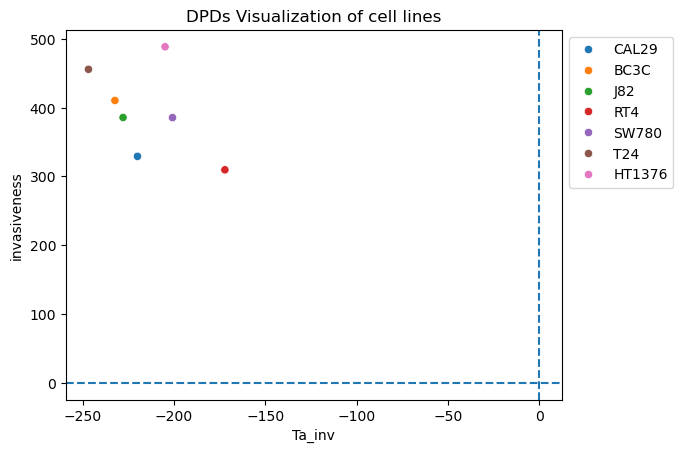

In [186]:

sns.scatterplot(DPD_cell_lines,y='invasiveness',x='Ta_inv',hue='cell_line_name')
plt.axvline(x=0,linestyle='--')
plt.axhline(y=0,linestyle='--')
plt.title("DPDs Visualization of cell lines")
plt.legend(bbox_to_anchor=(1,0, 0,1))


In [ ]:
WORKED OMG!!!

🔵 RT4, SW780 → Low grade, non-invasive

🟡 CAL29, J82 → Transitioning (T2, T3)

🔴 T24, BC3C, HT1376 → High-grade, invasive monsters


In [ ]:
	invasiveness	cell_line_name
ACH-000142	-220.034182	CAL29
ACH-000593	-232.377668	BC3C
ACH-000396	-227.936483	J82
ACH-000242	-172.171856	RT4
ACH-000384	-200.856000	SW780
ACH-000018	-246.875219	T24
ACH-000724	-204.926516	HT1376

In [ ]:
#Not successful stratification vector 

### Only T2 cluster1 genes <0.05

In [187]:
de_comp_importance= pd.read_pickle('/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_svm/blca_scR_scvi_t2_cluster1_DEG.xlsx')

In [190]:
vector= de_comp_importance['lfc_mean']

In [202]:
scvi_lfc_t2_int_lincs = vector.loc[vector.index.intersection(genes_list)]

In [203]:
blca_lm=blca[blca.columns.intersection(scvi_lfc_t2_int_lincs.index)]
display(blca_lm)
scvi_lfc_t2_int_lincs= scvi_lfc_t2_int_lincs.loc[blca_lm.columns]

,TIMP2,DSG2,MYLK,FGFR2,PTGS2,EDN1,CXCL2,AURKA,DHRS7,MYL9,...,PLK1,PRR15L,FOSL1,TUBB6,AURKB,GATA2,MUC1,HLA-DRA,HSPA1A,TSPAN4
ACH-001113,3.646163,6.329841,3.189034,3.767655,0.333424,4.363171,2.485427,6.819029,5.396091,0.000000,...,5.003602,0.839960,4.198494,6.994240,4.644433,2.163499,1.310340,0.263034,7.849124,3.130931
ACH-001289,5.256256,4.140779,0.411426,8.595183,0.925999,0.422233,0.000000,6.100978,6.717951,0.286881,...,5.875534,1.565597,1.405992,6.273516,5.830103,1.589763,3.336283,0.084064,4.778734,5.008541
ACH-001339,8.465077,5.095924,4.780310,0.137504,2.873813,0.356144,0.356144,6.797272,4.947199,2.634593,...,5.908573,0.084064,6.754086,6.979568,6.835545,1.367371,1.150560,10.273679,5.247168,6.616475
ACH-001538,5.365273,6.800771,4.698774,1.875780,2.084064,0.526069,2.498251,6.509062,7.140779,0.344828,...,5.420213,1.799087,6.613826,4.557655,5.541639,0.097611,1.604071,4.538538,7.664838,4.632850
ACH-000242,1.000000,5.508746,3.232661,4.000000,1.443607,2.604071,0.124328,5.882643,5.816088,2.748461,...,5.642413,2.032101,3.243364,4.081510,6.180108,4.763943,1.910733,2.077243,6.234770,1.948601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000285,0.815575,0.238787,0.275007,0.056584,0.084064,0.111031,0.028569,6.715893,3.922198,0.333424,...,6.798958,0.201634,0.367371,5.443938,6.797791,0.163499,0.555816,10.157347,1.956057,2.650765
ACH-002669,5.879461,6.405822,1.292782,0.815575,3.543496,3.518535,5.626439,5.844737,6.719183,2.560715,...,5.677790,0.150560,7.269688,1.959770,6.184280,1.765535,6.950585,0.863938,1.636915,5.259272
ACH-001858,8.788098,5.229203,6.023921,0.250962,0.659925,4.142413,2.283922,6.010556,5.988230,6.117903,...,5.493775,0.356144,7.309249,6.811471,6.593055,2.090853,5.649041,0.150560,6.972118,6.296090
ACH-001997,8.086508,6.483816,0.659925,3.689299,0.669027,5.263034,1.618239,6.136479,7.182494,3.948601,...,5.578939,4.047015,7.432458,4.090007,6.496015,0.678072,8.003658,0.565597,6.442280,3.867896


In [206]:
DPD_df = pd.DataFrame(
    np.zeros((len(blca_lm), 1)),
    index = list(blca_lm.index),
    columns = ['invasiveness'],
)

for exp_id in DPD_df.index:
    DPD_df.loc[exp_id, 'invasiveness'] = np.dot(blca_lm.loc[exp_id], scvi_lfc_t2_int_lincs.values)

display(DPD_df)

,invasiveness
ACH-001113,-109.976949
ACH-001289,-103.119871
ACH-001339,-156.137391
ACH-001538,-97.058053
ACH-000242,-75.393210
...,...
ACH-000285,-87.893312
ACH-002669,-91.589371
ACH-001858,-141.586450
ACH-001997,-93.815485


In [207]:
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines= DPD_df.loc[cell_line_ids]
DPD_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']
DPD_cell_lines


,invasiveness,cell_line_name
ACH-000142,-130.293040,CAL29
ACH-000593,-125.154654,BC3C
ACH-000396,-118.789731,J82
ACH-000242,-75.393210,RT4
ACH-000384,-100.491801,SW780
ACH-000018,-112.075912,T24
ACH-000724,-105.730108,HT1376


### STVs from cells of Ta and T2 origin with LINCS genes Ta-, T2 +

In [228]:
stv_new =  pd.read_pickle("/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_svm/stv_lincs_scR_inv.pkl")

In [230]:
stv_new= stv_new['n']

In [231]:
blca_lm=blca[blca.columns.intersection(stv_new.index)]
display(blca_lm)

,TSPAN6,SCYL3,BAD,LAP3,SNX11,CASP10,CFLAR,FKBP4,RBM6,SLC25A13,...,TWF2,HOXA10,LYN,CHMP4A,POLG2,RBM15B,MRPL12,IKBKE,DUSP14,PIP4K2B
ACH-001113,4.331992,2.792855,5.159871,4.783457,4.218781,2.000000,5.040454,6.632850,5.515069,3.276497,...,3.864929,0.000000,3.023255,6.287805,5.244126,3.620586,5.084064,0.097611,5.105594,4.934517
ACH-001289,4.567424,2.543496,5.543805,6.333782,4.289097,0.286881,4.414812,6.336462,5.490570,4.709842,...,4.882154,0.622930,1.469886,6.627753,4.154616,4.112700,5.460415,0.925999,5.304146,4.956986
ACH-001339,3.150560,2.333424,4.549053,6.161081,4.205549,1.207893,4.683135,5.364222,4.513491,5.195348,...,5.148527,4.326250,2.735522,5.694602,3.333424,3.190615,6.217812,2.516015,5.570159,4.213347
ACH-001538,5.085340,2.545968,5.537917,5.244887,3.438293,2.704872,4.514122,6.442612,5.146085,4.154616,...,5.439956,0.042644,3.053111,6.090218,3.842979,3.654206,6.721236,3.023255,4.100137,3.817623
ACH-000242,6.729417,2.456806,6.120186,5.712045,3.962549,1.996389,4.348374,6.162492,6.155628,4.974529,...,5.099295,3.729009,2.166715,6.642557,2.992768,5.202026,7.414558,3.651913,3.785551,4.192983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000285,0.056584,3.266037,6.109987,6.055933,4.838448,0.226509,2.684819,7.425342,6.404120,3.891419,...,5.557961,3.416840,4.048759,6.602884,5.776630,4.876762,7.796559,3.710393,3.163499,5.390255
ACH-002669,3.111031,1.541019,4.179511,5.836429,3.576522,3.428946,6.235727,6.324091,4.473137,4.909293,...,3.860963,3.521051,3.935460,6.144658,3.381283,2.994580,5.622930,3.358959,4.634012,3.107688
ACH-001858,4.390943,1.887525,5.680324,5.381283,3.939227,2.087463,5.052242,4.890933,4.512859,4.650190,...,5.745506,3.240314,3.563158,5.743623,3.634593,3.759156,6.482687,3.794936,4.737687,4.450881
ACH-001997,5.057450,2.538538,6.194954,7.678072,4.464668,2.066950,5.054414,5.929081,4.768184,4.522935,...,5.366672,3.381283,3.522307,6.693348,3.656496,4.169925,7.405822,2.987321,5.858727,3.737687


In [232]:
stv_new= stv_new.loc[blca_lm.columns]

In [233]:
DPD_df = pd.DataFrame(
    np.zeros((len(blca_lm), 1)),
    index = list(blca_lm.index),
    columns = ['invasiveness'],
)

for exp_id in DPD_df.index:
    DPD_df.loc[exp_id, 'invasiveness'] = np.dot(blca_lm.loc[exp_id], stv_new.values)

display(DPD_df)

,invasiveness
ACH-001113,-21.540136
ACH-001289,-21.438901
ACH-001339,-22.246127
ACH-001538,-21.980843
ACH-000242,-25.471099
...,...
ACH-000285,-17.364708
ACH-002669,-20.657503
ACH-001858,-24.642060
ACH-001997,-23.508735


In [234]:
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines= DPD_df.loc[cell_line_ids]
DPD_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']
DPD_cell_lines


,invasiveness,cell_line_name
ACH-000142,-23.454942,CAL29
ACH-000593,-22.685778,BC3C
ACH-000396,-23.800621,J82
ACH-000242,-25.471099,RT4
ACH-000384,-25.066518,SW780
ACH-000018,-21.569904,T24
ACH-000724,-24.689943,HT1376


### Cluster 3 DEGs

In [235]:
cluster3_lfc = pd.read_excel('/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_svm/blca_scR_scvi_DEG_1.xlsx',index_col=0)

In [250]:
cluster3_T2 = cluster3_lfc.iloc[6000:8000][['Gene','lfc_mean']]
cluster3_T2.reset_index(inplace=True)
cluster3_T2.drop(columns=['comparison'],inplace=True)
cluster3_T2.set_index('Gene',inplace=True)
cluster3_T2

,lfc_mean
Gene,
S100A8,9.952347
TCHH,7.817023
LYNX1,7.238245
SERPINB4,6.948934
KRTDAP,6.676867
...,...
TRIM31,-6.078705
TESC,-6.369891
IGFBP2,-6.542513


In [251]:
blca_lm=blca[blca.columns.intersection(cluster3_T2.index)]
display(blca_lm)

,TSPAN6,GCLC,CD99,HS3ST1,TMEM176A,TFPI,ARF5,PLXND1,RECQL,PDK4,...,CCL4,FCGBP,CCL15,UHRF1,CCL4L2,CCL3L3,MARCKS,CCL3,CISD3,ADORA3
ACH-001113,4.331992,6.500005,5.941576,0.097611,0.000000,0.056584,7.055174,5.289834,6.505097,0.000000,...,0.000000,0.084064,0.000000,5.223423,0.097611,0.214125,6.817751,0.000000,4.187451,0.000000
ACH-001289,4.567424,4.221877,6.759688,0.084064,0.056584,0.056584,7.561861,3.769772,5.390255,0.000000,...,0.000000,0.070389,0.000000,4.595742,0.097611,0.000000,4.741467,0.150560,3.640390,0.028569
ACH-001339,3.150560,3.682573,8.295998,0.422233,0.201634,4.060912,6.686781,7.216746,6.234961,1.378512,...,0.214125,0.014355,0.000000,3.903038,0.000000,0.176323,5.954662,1.035624,4.566815,0.137504
ACH-001538,5.085340,4.489928,6.909413,2.718088,0.070389,3.317594,6.980254,0.948601,5.638943,2.430285,...,0.659925,0.028569,0.056584,3.782409,0.000000,0.000000,6.244126,0.722466,3.491853,0.000000
ACH-000242,6.729417,7.127117,7.208283,3.005400,0.000000,0.855990,7.428276,2.518535,4.836429,1.007196,...,0.056584,1.163499,0.918386,6.211986,0.000000,0.000000,5.599913,0.097611,4.571070,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000285,0.056584,4.829850,5.217618,0.632268,0.000000,0.250962,7.767125,3.195348,6.551208,0.028569,...,0.163499,1.580145,0.042644,7.921781,0.000000,0.042644,4.488001,1.070389,3.825786,0.056584
ACH-002669,3.111031,4.472488,6.550131,1.735522,3.580145,6.744430,7.206331,4.947666,5.870858,0.495695,...,0.084064,0.124328,0.000000,3.634593,0.226509,2.422233,3.903038,1.490570,3.171527,0.000000
ACH-001858,4.390943,5.410748,8.545853,0.757023,0.000000,8.195692,7.899357,6.558115,6.041988,0.941106,...,0.000000,0.176323,0.000000,3.752749,0.000000,0.000000,6.637349,0.000000,4.233428,0.028569
ACH-001997,5.057450,4.469886,7.018256,2.226509,0.422233,5.441616,7.922495,4.145677,5.310704,1.454176,...,0.000000,0.992768,0.000000,5.293150,0.000000,0.000000,5.920293,0.263034,4.662775,0.000000


In [252]:
cluster3_T2=cluster3_T2.loc[blca.columns.intersection(cluster3_T2.index)]
cluster3_T2

,lfc_mean
TSPAN6,-0.269631
GCLC,-1.751781
CD99,0.414643
HS3ST1,-1.565612
TMEM176A,0.020122
...,...
CCL3L3,1.310538
MARCKS,1.136047
CCL3,1.437942
CISD3,-0.128588


In [253]:
DPD_df = pd.DataFrame(
    np.zeros((len(blca_lm), 1)),
    index = list(blca_lm.index),
    columns = ['invasiveness'],
)
for exp_id in DPD_df.index:
    DPD_df.loc[exp_id, 'invasiveness'] = np.dot(blca_lm.loc[exp_id], cluster3_T2['lfc_mean'])

display(DPD_df)

,invasiveness
ACH-001113,2779.851276
ACH-001289,2362.596662
ACH-001339,2492.402285
ACH-001538,2731.625117
ACH-000242,1208.533428
...,...
ACH-000285,2991.244637
ACH-002669,2371.692670
ACH-001858,2322.170907
ACH-001997,2043.424701


In [254]:
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines= DPD_df.loc[cell_line_ids]
DPD_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']
DPD_cell_lines


,invasiveness,cell_line_name
ACH-000142,2320.662048,CAL29
ACH-000593,2780.657899,BC3C
ACH-000396,2468.796631,J82
ACH-000242,1208.533428,RT4
ACH-000384,1997.916810,SW780
ACH-000018,2597.707944,T24
ACH-000724,2955.765929,HT1376


In [255]:
cluster3_Ta = cluster3_lfc.iloc[8000:][['Gene','lfc_mean']]
cluster3_Ta.reset_index(inplace=True)
cluster3_Ta.drop(columns=['comparison'],inplace=True)
cluster3_Ta.set_index('Gene',inplace=True)
cluster3_Ta

,lfc_mean
Gene,
PLA2G2A,4.706354
GPX3,4.511640
EPB41L3,4.122284
EREG,3.972359
CYP1A1,3.870992
...,...
DNAJC15,-3.063562
IGHA1,-3.213724
BASP1,-3.283223


In [256]:
blca_lm=blca[blca.columns.intersection(cluster3_Ta.index)]
display(blca_lm)

,TSPAN6,GCLC,CD99,HS3ST1,TMEM176A,TFPI,ARF5,PLXND1,RECQL,PDK4,...,CCL4,FCGBP,CCL15,UHRF1,CCL4L2,CCL3L3,MARCKS,CCL3,CISD3,ADORA3
ACH-001113,4.331992,6.500005,5.941576,0.097611,0.000000,0.056584,7.055174,5.289834,6.505097,0.000000,...,0.000000,0.084064,0.000000,5.223423,0.097611,0.214125,6.817751,0.000000,4.187451,0.000000
ACH-001289,4.567424,4.221877,6.759688,0.084064,0.056584,0.056584,7.561861,3.769772,5.390255,0.000000,...,0.000000,0.070389,0.000000,4.595742,0.097611,0.000000,4.741467,0.150560,3.640390,0.028569
ACH-001339,3.150560,3.682573,8.295998,0.422233,0.201634,4.060912,6.686781,7.216746,6.234961,1.378512,...,0.214125,0.014355,0.000000,3.903038,0.000000,0.176323,5.954662,1.035624,4.566815,0.137504
ACH-001538,5.085340,4.489928,6.909413,2.718088,0.070389,3.317594,6.980254,0.948601,5.638943,2.430285,...,0.659925,0.028569,0.056584,3.782409,0.000000,0.000000,6.244126,0.722466,3.491853,0.000000
ACH-000242,6.729417,7.127117,7.208283,3.005400,0.000000,0.855990,7.428276,2.518535,4.836429,1.007196,...,0.056584,1.163499,0.918386,6.211986,0.000000,0.000000,5.599913,0.097611,4.571070,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000285,0.056584,4.829850,5.217618,0.632268,0.000000,0.250962,7.767125,3.195348,6.551208,0.028569,...,0.163499,1.580145,0.042644,7.921781,0.000000,0.042644,4.488001,1.070389,3.825786,0.056584
ACH-002669,3.111031,4.472488,6.550131,1.735522,3.580145,6.744430,7.206331,4.947666,5.870858,0.495695,...,0.084064,0.124328,0.000000,3.634593,0.226509,2.422233,3.903038,1.490570,3.171527,0.000000
ACH-001858,4.390943,5.410748,8.545853,0.757023,0.000000,8.195692,7.899357,6.558115,6.041988,0.941106,...,0.000000,0.176323,0.000000,3.752749,0.000000,0.000000,6.637349,0.000000,4.233428,0.028569
ACH-001997,5.057450,4.469886,7.018256,2.226509,0.422233,5.441616,7.922495,4.145677,5.310704,1.454176,...,0.000000,0.992768,0.000000,5.293150,0.000000,0.000000,5.920293,0.263034,4.662775,0.000000


In [258]:
cluster3_Ta=cluster3_Ta.loc[blca.columns.intersection(cluster3_Ta.index)]
cluster3_Ta

,lfc_mean
TSPAN6,0.528932
GCLC,1.700422
CD99,0.593422
HS3ST1,0.862836
TMEM176A,-1.527470
...,...
CCL3L3,-0.627989
MARCKS,0.207946
CCL3,-0.712292
CISD3,0.542104


In [259]:
DPD_df = pd.DataFrame(
    np.zeros((len(blca_lm), 1)),
    index = list(blca_lm.index),
    columns = ['invasiveness'],
)
for exp_id in DPD_df.index:
    DPD_df.loc[exp_id, 'invasiveness'] = np.dot(blca_lm.loc[exp_id], cluster3_Ta['lfc_mean'])

display(DPD_df)

,invasiveness
ACH-001113,2148.424004
ACH-001289,2191.733751
ACH-001339,2053.519540
ACH-001538,2122.830897
ACH-000242,2643.238804
...,...
ACH-000285,1888.741389
ACH-002669,1936.191137
ACH-001858,2106.753520
ACH-001997,2149.345018


In [260]:
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines= DPD_df.loc[cell_line_ids]
DPD_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']
DPD_cell_lines

,invasiveness,cell_line_name
ACH-000142,2584.935997,CAL29
ACH-000593,2246.168238,BC3C
ACH-000396,2309.969701,J82
ACH-000242,2643.238804,RT4
ACH-000384,2690.109856,SW780
ACH-000018,2313.796487,T24
ACH-000724,2349.452149,HT1376


### previous

In [ ]:
#dot product
blca_lm=blca[blca.columns.intersection(logfold_df['query'].values)]
display(blca_lm)

,ADGRA2,MYOC,SOAT1,NTN1,TGFBR3,IPCEF1,FGFR1,REM1,P2RX7,ISM1,...,BHLHA15,OLFML1,TPCN1,TLE1,ANXA4,MAFB,TCEA3,EBF2,SPRR2F,FXYD1
ACH-001113,0.310340,0.000000,4.635174,0.910733,3.936402,0.028569,4.413459,0.000000,0.344828,0.042644,...,0.333424,0.028569,3.691534,3.727920,5.460087,4.043519,3.032101,0.042644,0.000000,1.480265
ACH-001289,0.536053,0.042644,4.298658,7.566206,2.097611,2.014355,8.534264,0.000000,0.056584,0.028569,...,1.827819,3.795975,1.599318,3.867896,5.842225,0.014355,0.485427,0.238787,0.000000,0.344828
ACH-001339,2.166715,0.659925,4.249445,0.111031,3.272023,0.042644,2.513491,1.475085,4.223423,0.189034,...,0.111031,0.056584,3.275007,3.792855,5.487679,0.731183,0.238787,0.056584,0.000000,1.443607
ACH-001538,0.163499,0.000000,3.451541,0.000000,1.150560,0.731183,0.084064,0.000000,0.124328,1.963474,...,0.505891,0.000000,4.319040,4.032982,5.092123,0.176323,3.273516,0.000000,0.400538,0.000000
ACH-000242,0.084064,0.000000,3.226509,0.150560,4.971314,0.985500,0.356144,0.000000,0.028569,0.163499,...,0.028569,0.097611,5.126395,4.780310,6.092123,0.565597,0.137504,0.000000,0.000000,0.084064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000285,0.176323,0.000000,4.456149,0.464668,0.176323,0.028569,0.505891,0.000000,0.214125,0.000000,...,0.400538,0.310340,5.372952,4.633431,0.963474,0.000000,0.056584,0.028569,0.000000,1.510962
ACH-002669,0.815575,0.000000,3.732269,1.304511,0.604071,0.042644,1.195348,0.000000,0.084064,0.863938,...,1.933573,0.028569,3.775051,4.142413,5.722739,0.084064,3.798051,0.000000,0.000000,0.584963
ACH-001858,0.641546,0.000000,4.559492,0.028569,1.395063,0.014355,4.874797,0.014355,0.910733,0.014355,...,0.250962,0.000000,5.701272,6.050937,5.572283,0.056584,0.475085,2.035624,0.000000,0.000000
ACH-001997,0.042644,0.000000,2.976364,0.056584,1.405992,0.000000,0.014355,0.000000,0.163499,0.014355,...,0.124328,0.000000,3.990047,5.159871,7.353676,0.000000,0.042644,0.000000,0.000000,0.070389


In [ ]:
DPD_df = pd.DataFrame(
    np.zeros((len(blca_lm), 1)),
    index = list(blca_lm.index),
    columns = ['invasiveness'],
)

In [ ]:
DPD_df

,invasiveness
ACH-001113,0.0
ACH-001289,0.0
ACH-001339,0.0
ACH-001538,0.0
ACH-000242,0.0
...,...
ACH-000285,0.0
ACH-002669,0.0
ACH-001858,0.0
ACH-001997,0.0


In [ ]:
vector = logfold_df[['query','logFC']]
vector.set_index('query',inplace=True)
vector= vector.loc[blca.columns.intersection(logfold_df['query'].values)]

In [ ]:
for exp_id in DPD_df.index:
    DPD_df.loc[exp_id, 'invasiveness'] = np.dot(blca_lm.loc[exp_id], vector.loc[:, 'logFC'])

display(DPD_df)

,invasiveness
ACH-001113,-143.538467
ACH-001289,-183.784108
ACH-001339,-173.320454
ACH-001538,-93.455568
ACH-000242,-116.856270
...,...
ACH-000285,-89.454437
ACH-002669,-113.632540
ACH-001858,-158.769753
ACH-001997,-90.367655


In [ ]:
cell_line_ids=['ACH-000142','ACH-000593','ACH-000396','ACH-000242','ACH-000384',
               'ACH-000018','ACH-000724']

DPD_cell_lines= DPD_df.loc[cell_line_ids]
DPD_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']


In [ ]:
DPD_cell_lines

,invasiveness,cell_line_name
ACH-000142,-137.244719,CAL29
ACH-000593,-145.950904,BC3C
ACH-000396,-158.354899,J82
ACH-000242,-116.856270,RT4
ACH-000384,-122.446398,SW780
ACH-000018,-122.575912,T24
ACH-000724,-159.888360,HT1376


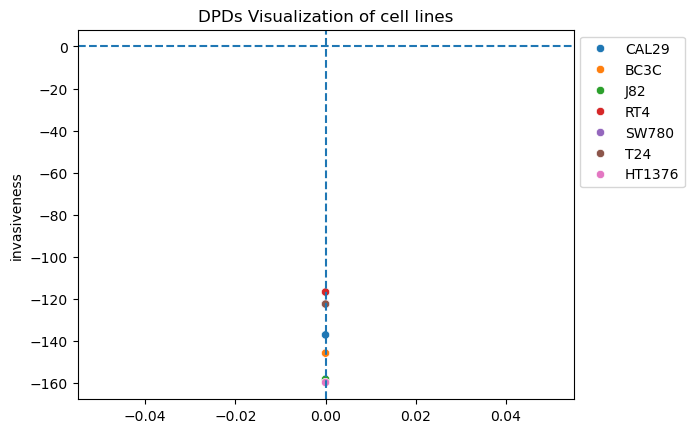

In [ ]:
sns.scatterplot(DPD_cell_lines,x=np.zeros(7),y='invasiveness',hue='cell_line_name')
plt.axvline(x=0,linestyle='--')
plt.axhline(y=0,linestyle='--')
plt.title("DPDs Visualization of cell lines")
plt.legend(bbox_to_anchor=(1,0, 0,1))

#plt.xlabel('DPD_N/MIBC')
#plt.savefig("/Users/lidiayung/Downloads/DPD_sct_lincs_healthy_onc.png",dpi=300)
